In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/league/final_data.csv")

## Drop Unnecessary Features

In [ ]:
df=df.drop(["championId","teamId","allInPings","needVisionPings","sightWardsBoughtInGame","unrealKills","teamEarlySurrendered","totalHealsOnTeammates","riotIdTagline","riotIdName","summonerLevel","summoner1Casts","summoner1Id","summoner2Casts","summoner2Id","pushPings","assistMePings","baitPings","basicPings","totalTimeSpentDead","championTransform","commandPings","dangerPings","eligibleForProgression","enemyMissingPings","enemyVisionPings","getBackPings","holdPings","onMyWayPings","profileIcon","nexusLost","gameEndedInSurrender","nexusTakedowns","bountyLevel","nexusKills","participantId","challenges","lane","perks","puuid","role","summonerId","summonerName","teamPosition","longestTimeSpentLiving","goldSpent","spell1Casts","spell2Casts","spell3Casts","spell4Casts","item0","item1","item2","item3","item4","item5","item6"],axis=1)

## EDA

### Check Duplicate

In [ ]:
df[df.duplicated()]

,assists,baronKills,champExperience,champLevel,championName,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,...,trueDamageTaken,turretKills,turretTakedowns,turretsLost,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   assists                         27000 non-null  int64 
 1   baronKills                      27000 non-null  int64 
 2   champExperience                 27000 non-null  int64 
 3   champLevel                      27000 non-null  int64 
 4   championName                    27000 non-null  object
 5   consumablesPurchased            27000 non-null  int64 
 6   damageDealtToBuildings          27000 non-null  int64 
 7   damageDealtToObjectives         27000 non-null  int64 
 8   damageDealtToTurrets            27000 non-null  int64 
 9   damageSelfMitigated             27000 non-null  int64 
 10  deaths                          27000 non-null  int64 
 11  detectorWardsPlaced             27000 non-null  int64 
 12  doubleKills                     27000 non-null

### Check Missing values

In [ ]:
df.isna().sum()

assists                    0
baronKills                 0
champExperience            0
champLevel                 0
championName               0
                          ..
visionScore                0
visionWardsBoughtInGame    0
wardsKilled                0
wardsPlaced                0
win                        0
Length: 64, dtype: int64

### Check label balance

In [ ]:
df["win"].value_counts()

False    13500
True     13500
Name: win, dtype: int64

### Label Encoding

In [ ]:
df["win"] = df["win"].replace({True: 1, False: 0})

### Numerical Values

#### Outlier Check

In [ ]:
numerical = df.select_dtypes(include=["int64","float64","bool"]).columns.tolist()

In [ ]:
len(numerical)

62

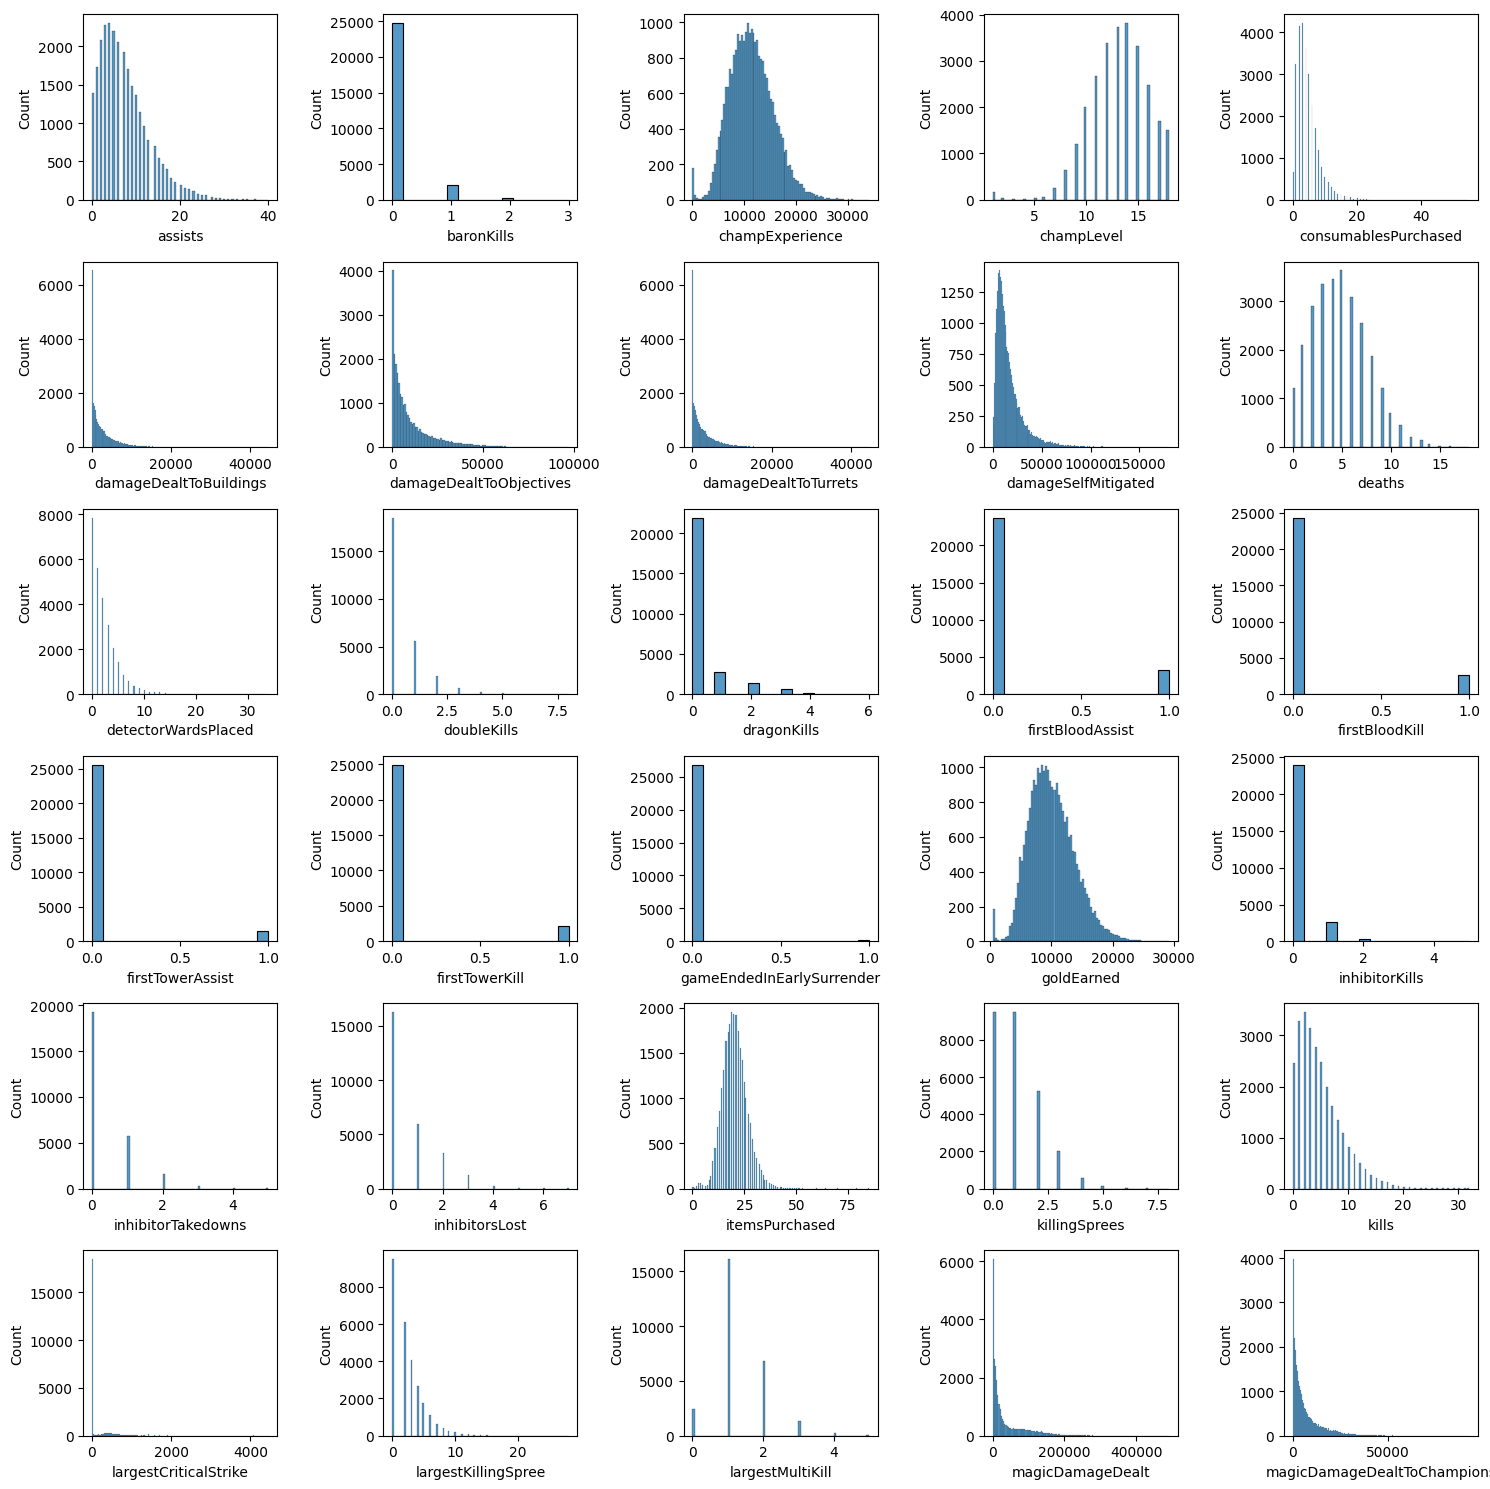

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
axs = axs.flatten()

# Iterate through all the numerical columns and create a plot for each one
for i, col in enumerate(numerical[:30]):
    sns.histplot(x=df[col], ax=axs[i])
plt.tight_layout()



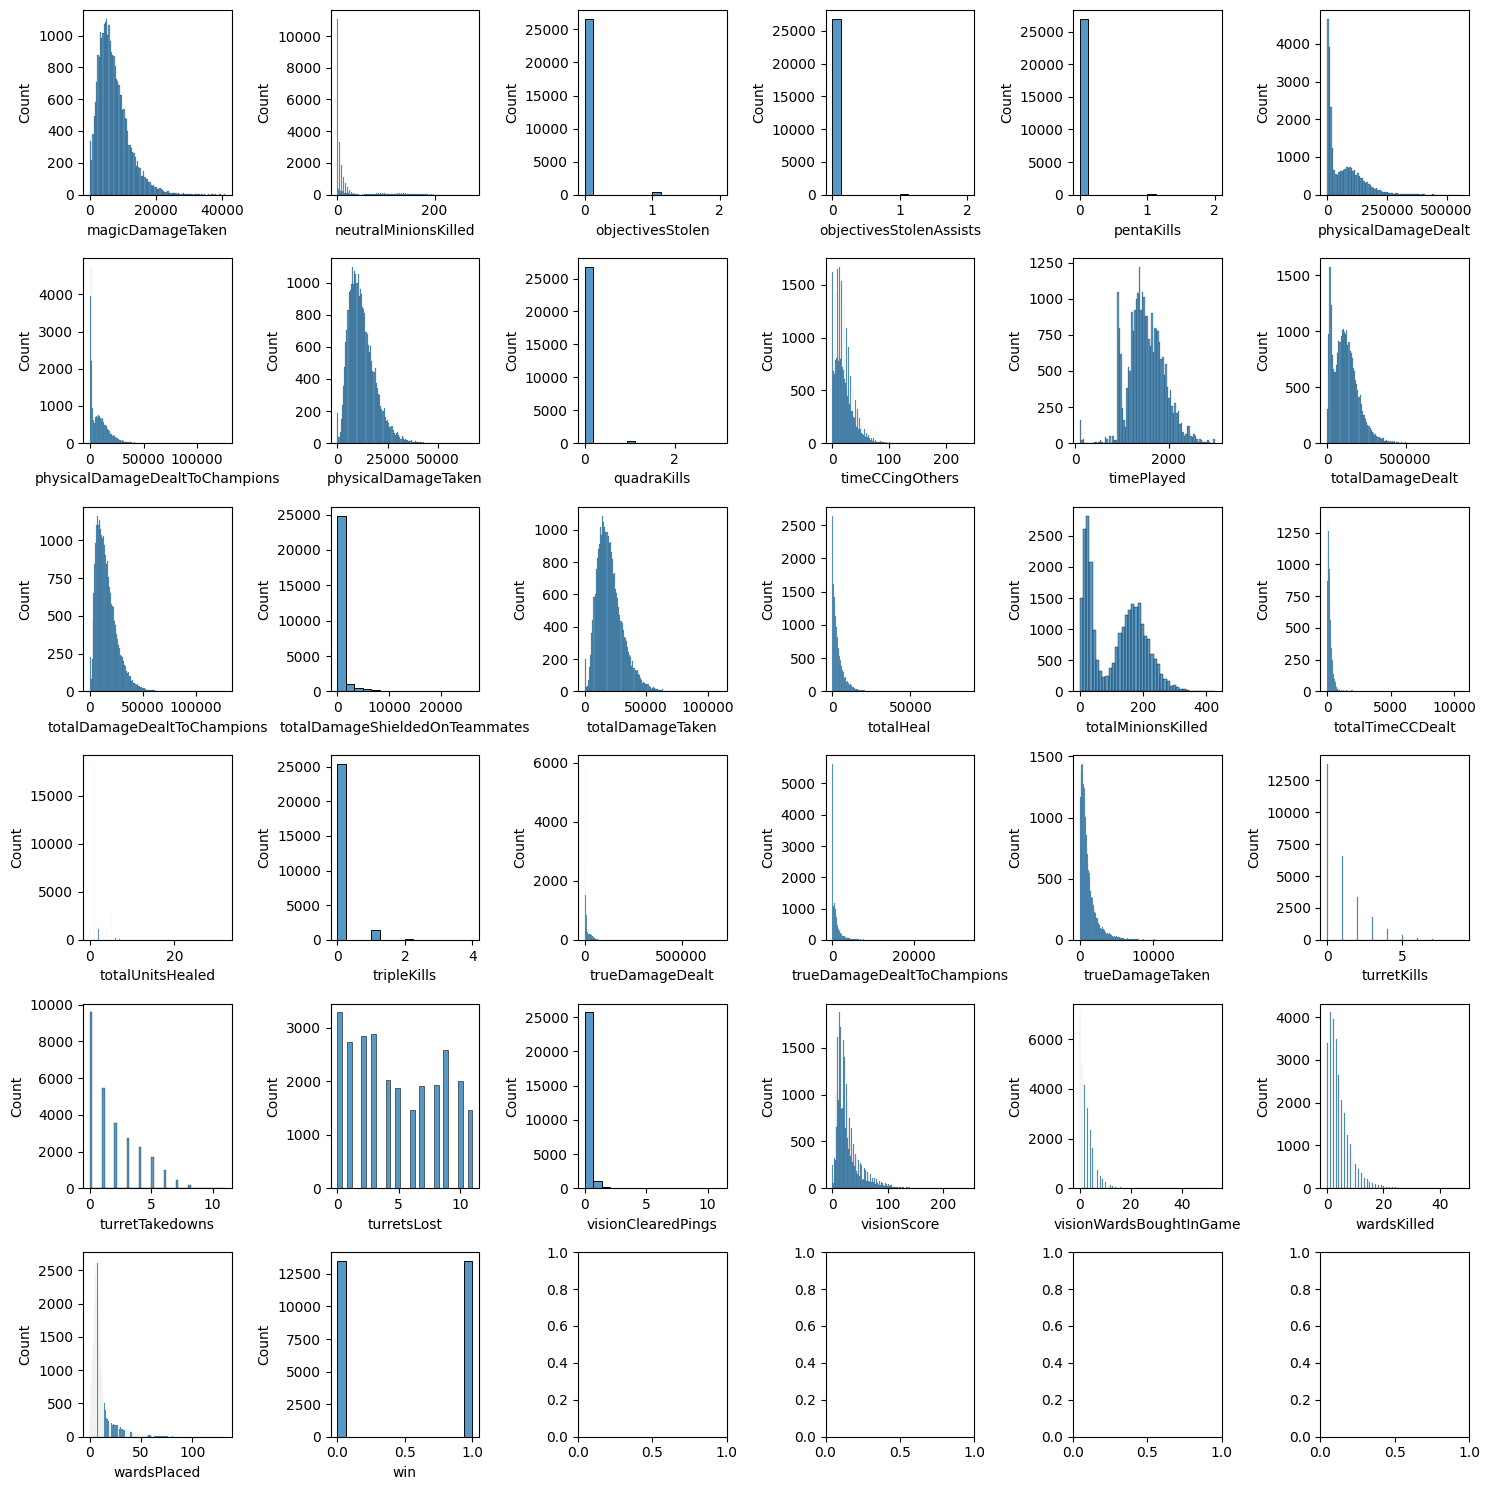

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))
axs = axs.flatten()

for i, col in enumerate(numerical[30:]):
    sns.histplot(x=df[col], ax=axs[i])
plt.tight_layout()
plt.show()

#### Correlation with Target

In [ ]:
cor=df.corrwith(df["win"]).sort_values(ascending=False)

<Axes: >

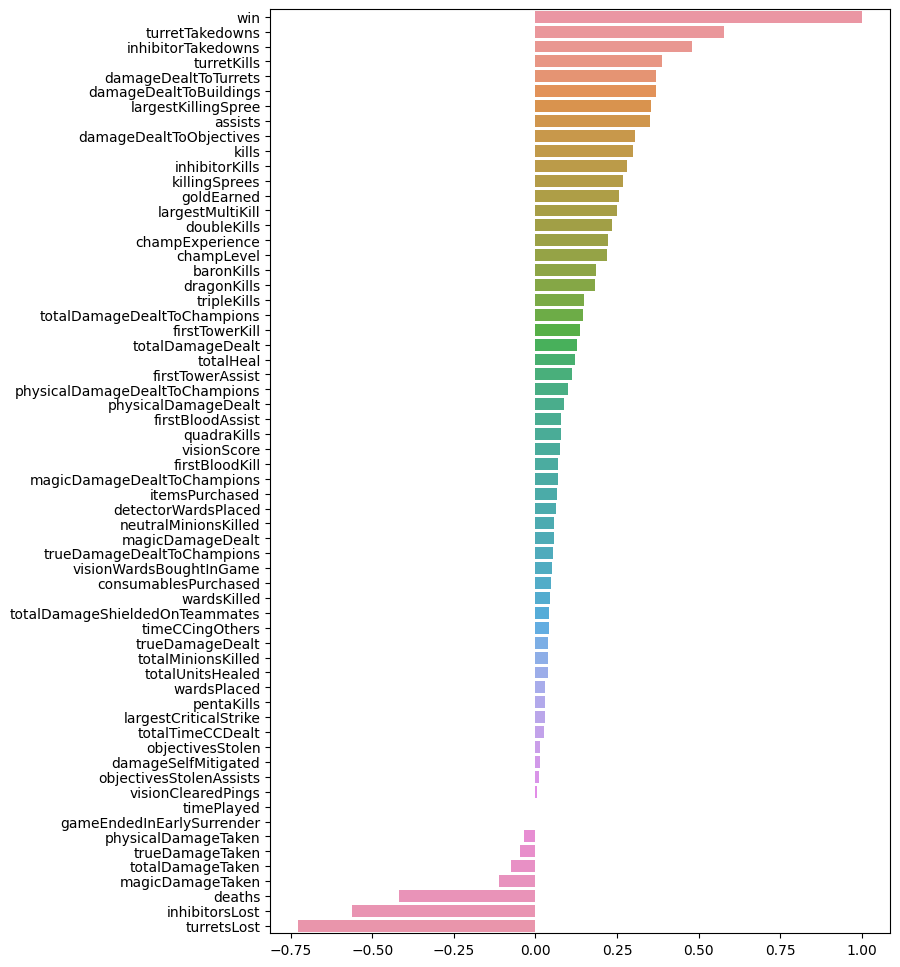

In [ ]:
plt.figure(figsize=(8, 12))
sns.barplot(x=cor.values, y=cor.index)


## Feature Engineer

### Catgorical Feature encoding

In [ ]:
cat_columns = df.select_dtypes(['object']).columns

In [ ]:
df = pd.get_dummies(df,columns=cat_columns)

### Create New Features

#### KDA

In [ ]:
df["deaths"] = df["deaths"].replace(0, 1)

In [ ]:
df["kda"]=(df["kills"]+df["assists"])/df["deaths"]

#### Convert features into minutes

In [ ]:
feature=["goldEarned","totalDamageDealt","totalMinionsKilled","totalHeal","champExperience","damageDealtToObjectives"]

In [ ]:
df[feature].head()

,goldEarned,totalDamageDealt,totalMinionsKilled,totalHeal,champExperience,damageDealtToObjectives
0,4459,37408,78,216,4908,843
1,4288,65899,3,2573,4261,3764
2,3532,18386,46,1240,4488,0
3,4183,28525,79,697,4477,0
4,3948,16776,27,0,4212,0


#### Convert time from seconds to minutes

In [ ]:
df["timePlayed"]=df["timePlayed"]/60

In [ ]:
df['timePlayed'] = df['timePlayed'].round(1)

In [ ]:
for i in feature:
  df[i]=df[i]/df['timePlayed']

## Train, Validation, Test Set Split

In [ ]:
X = df.drop(["win","kills","deaths","assists"],axis=1)
y = df['win']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2739
           1       0.80      0.75      0.78      2661

    accuracy                           0.79      5400
   macro avg       0.79      0.78      0.78      5400
weighted avg       0.79      0.79      0.78      5400



In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.785

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_proba)

0.853561216270226

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

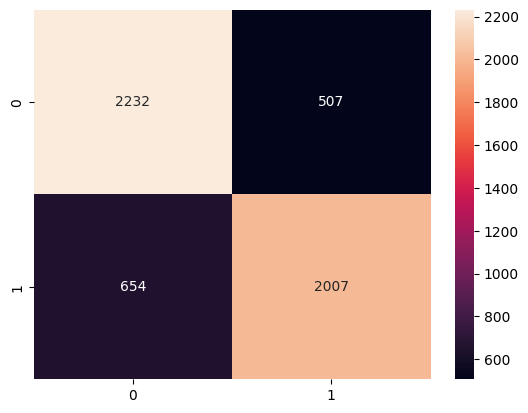

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt="d")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2716
           1       0.95      0.95      0.95      2684

    accuracy                           0.95      5400
   macro avg       0.95      0.95      0.95      5400
weighted avg       0.95      0.95      0.95      5400



In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9533333333333334

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_proba)

0.9919062315494206

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

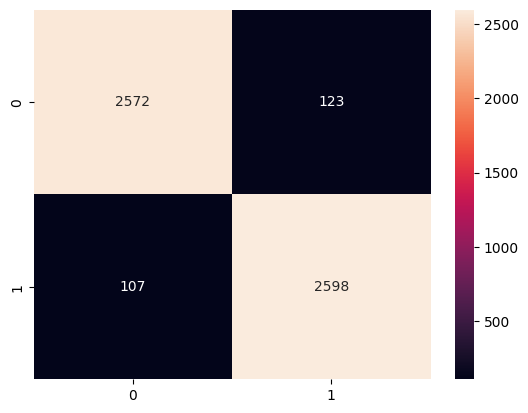

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt="d")

## MLP

In [ ]:
# importing modules
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_pred=mlp.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      2739
           1       0.76      0.96      0.85      2661

    accuracy                           0.83      5400
   macro avg       0.86      0.84      0.83      5400
weighted avg       0.86      0.83      0.83      5400



In [ ]:
y_pred_proba = mlp.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_proba)

0.8887637599010711

## LGBM

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMClassifier()

In [ ]:
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred=lgbm.predict(X_test)

### Confusion Matrix

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

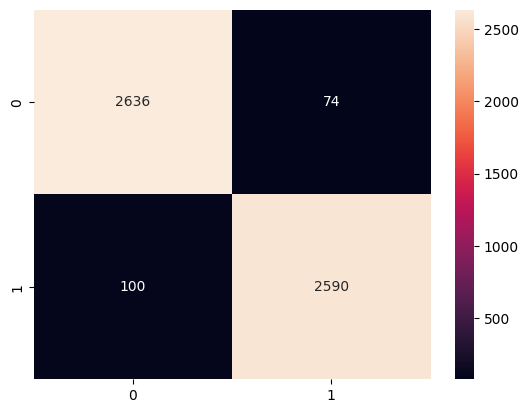

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt="d")

### classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2695
           1       0.96      0.97      0.97      2705

    accuracy                           0.97      5400
   macro avg       0.97      0.97      0.97      5400
weighted avg       0.97      0.97      0.97      5400



In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.9675925925925926

##### 5-Fold Cross Validation for train and test

In [ ]:
from sklearn.model_selection import cross_val_score
cv_train = cross_val_score(lgbm, X_train, y_train, cv=5,scoring="accuracy")
print('Cross validation scores for train:', cv_train.round(2))
print('Average Cross validation scores for train:', np.average(cv_train).round(2))

Cross validation scores for train: [0.97 0.97 0.97 0.96 0.96]
Average Cross validation scores for train: 0.97


In [ ]:
from sklearn.model_selection import cross_val_score
cv_test = cross_val_score(lgbm, X_test, y_test, cv=5,scoring="accuracy")
print('Cross validation scores for test:', cv_test.round(2))
print('Average Cross validation scores for test:', np.average(cv_test).round(2))

Cross validation scores for test: [0.95 0.96 0.96 0.96 0.96]
Average Cross validation scores for test: 0.96


### ROC_AUC

##### 5-Fold Cross Validation for train and test

In [ ]:
from sklearn.model_selection import cross_val_score
cv_train = cross_val_score(lgbm, X_train, y_train, cv=5,scoring="roc_auc")
print('Cross validation scores for train:', cv_train.round(10))
print('Average Cross validation scores for train:', np.average(cv_train).round(5))

Cross validation scores for train: [0.9973863  0.99645105 0.99573763 0.99566701 0.99486636]
Average Cross validation scores for train: 0.99602


In [ ]:
from sklearn.model_selection import cross_val_score
cv_test = cross_val_score(lgbm, X_test, y_test, cv=5,scoring="roc_auc")
print('Cross validation scores for test:', cv_test.round(5))
print('Average Cross validation scores for test:', np.average(cv_test).round(5))

Cross validation scores for test: [0.99428 0.9943  0.9946  0.99291 0.99245]
Average Cross validation scores for test: 0.99371


In [ ]:
y_pred_proba = lgbm.predict_proba(X_test)[:, 1]

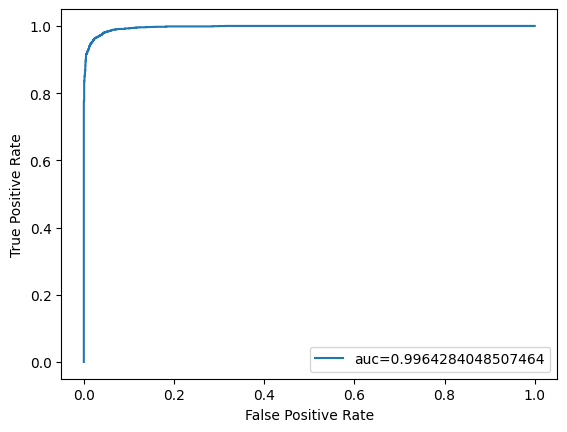

In [ ]:
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
     

In [ ]:
pip install shap --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 9.0 MB/s eta 0:00:00


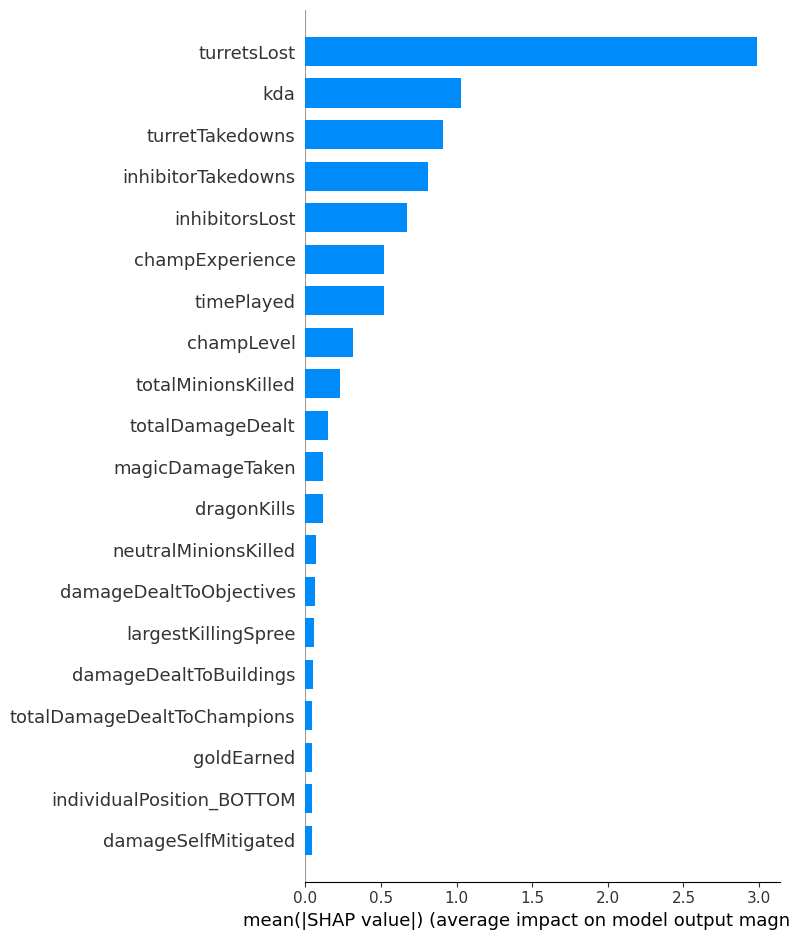

In [ ]:
import shap
explainer= shap.Explainer(lgbm)
shap_values= explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],plot_type="bar",feature_names=X_test.columns)

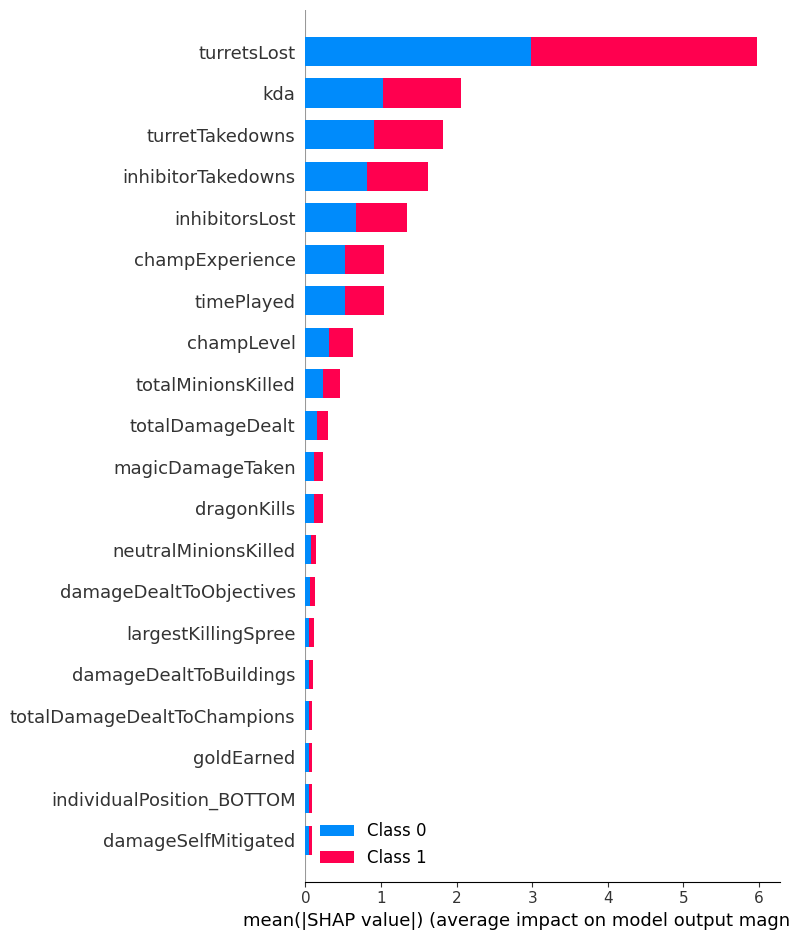

In [ ]:
shap.summary_plot(shap_values,X_test)

## Catboost

### catboost

In [ ]:
pip install catboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.4 MB/s eta 0:00:00


In [ ]:
import catboost
cbt = catboost.CatBoostClassifier()

In [ ]:
cbt.fit(X_train, y_train,verbose=False)

In [ ]:
y_pred_cbt=cbt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_cbt))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2739
           1       0.97      0.96      0.96      2661

    accuracy                           0.96      5400
   macro avg       0.96      0.96      0.96      5400
weighted avg       0.96      0.96      0.96      5400



In [ ]:
metrics.accuracy_score(y_test, y_pred_cbt)

0.9642592592592593

In [ ]:
y_pred_proba = cbt.predict_proba(X_test)[:, 1]

In [ ]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.9952880429510738

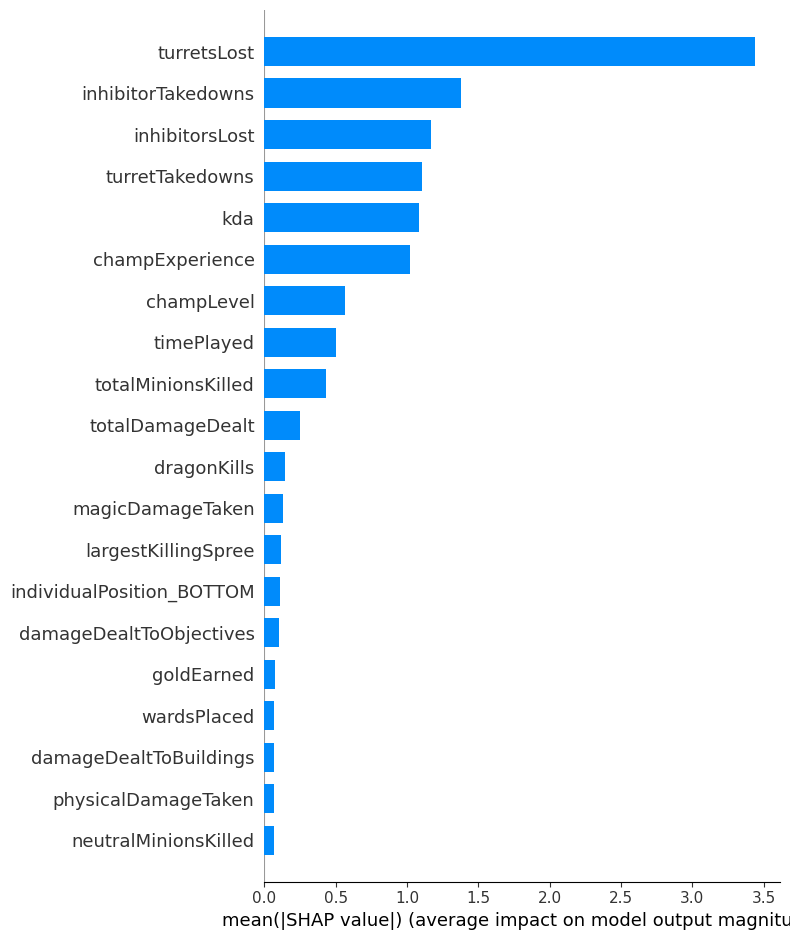

In [ ]:
import shap
explainer= shap.Explainer(cbt)
shap_values= explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_type="bar")

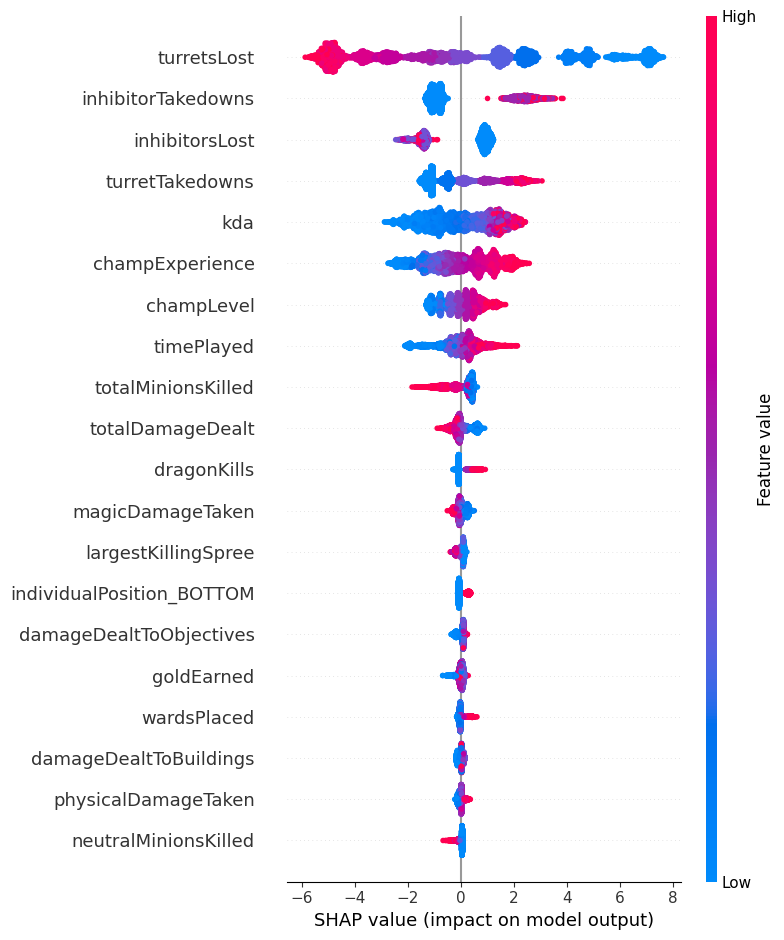

In [ ]:
shap.summary_plot(shap_values, X_test)

## save and retrain model with most important parameters

In [ ]:
import pickle

In [ ]:
X = df[["turretsLost","timePlayed","goldEarned","totalMinionsKilled","inhibitorTakedowns","inhibitorsLost","turretTakedowns","kda","champExperience","totalDamageDealt","dragonKills","damageDealtToBuildings"]]
y = df['win']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y,train_size=0.80)

In [ ]:
pip install catboost --quiet

In [ ]:
import catboost 
cbt = catboost.CatBoostClassifier()
cbt.fit(X_train1, y_train1,verbose=False)

In [ ]:
y_pred=cbt.predict(X_test1)

In [ ]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2708
           1       0.97      0.96      0.97      2692

    accuracy                           0.97      5400
   macro avg       0.97      0.97      0.97      5400
weighted avg       0.97      0.97      0.97      5400

